In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet201
from keras import layers
from keras.models import Model
from keras import optimizers
from glob import glob
import pathlib
import matplotlib.pyplot as plt


In [2]:
densenet = DenseNet201(input_shape = (55,55,3),include_top=False,weights='imagenet')
for layer in densenet.layers:
    layer.trainable = True
out = densenet.output

x = Flatten()(out)
x = Dense(40,activation = 'softmax')(x)

model = Model(inputs=densenet.input,outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 55, 55, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 61, 61, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 28, 28, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 28, 28, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

In [3]:

path_train = pathlib.Path('./images/train/')
path_test = pathlib.Path('./images/test/')
train_images_files = path_test.glob('*/*.jpeg')
test_images_files = path_test.glob('*/*.jpeg')


In [4]:
train_dir = './images/train/'
validation_dir = './images/test/'

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

batch_size = 30

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size=(55,55),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    )

validation_generator = test_datagen.flow_from_directory(
    directory = validation_dir,
    target_size=(55,55),
    batch_size=batch_size,
    class_mode='categorical')

Found 27761 images belonging to 40 classes.
Found 10008 images belonging to 40 classes.


In [5]:
epochs = 50
history = model.fit_generator(
    train_generator,
    steps_per_epoch= len(list(train_images_files))//batch_size,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps=len(list(test_images_files))//batch_size
)

C:\Users\hp\AppData\Local\Temp\ipykernel_25676\853784012.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
333/333 [==============================] - 628s 2s/step - loss: 3.1961 - accuracy: 0.1650 - val_loss: 11.0623 - val_accuracy: 0.0498
Epoch 2/50
333/333 [==============================] - 605s 2s/step - loss: 2.5983 - accuracy: 0.2726 - val_loss: 5.7100 - val_accuracy: 0.1485
Epoch 3/50
333/333 [==============================] - 605s 2s/step - loss: 2.3228 - accuracy: 0.3528 - val_loss: 7.4454 - val_accuracy: 0.0921
Epoch 4/50
333/333 [==============================] - 682s 2s/step - loss: 2.1796 - accuracy: 0.3770 - val_loss: 20.9641 - val_accuracy: 0.0555
Epoch 5/50
333/333 [==============================] - 641s 2s/step - loss: 2.0290 - accuracy: 0.4137 - val_loss: 2.2111 - val_accuracy: 0.3864
Epoch 6/50
333/333 [==============================] - 676s 2s/step - loss: 1.7426 - accuracy: 0.4834 - val_loss: 2.3653 - val_accuracy: 0.3575
Epoch 7/50
333/333 [==============================] - 633s 2s/step - loss: 1.8948 - accuracy: 0.4555 - val_loss: 5.4234 - val_accuracy: 0.08

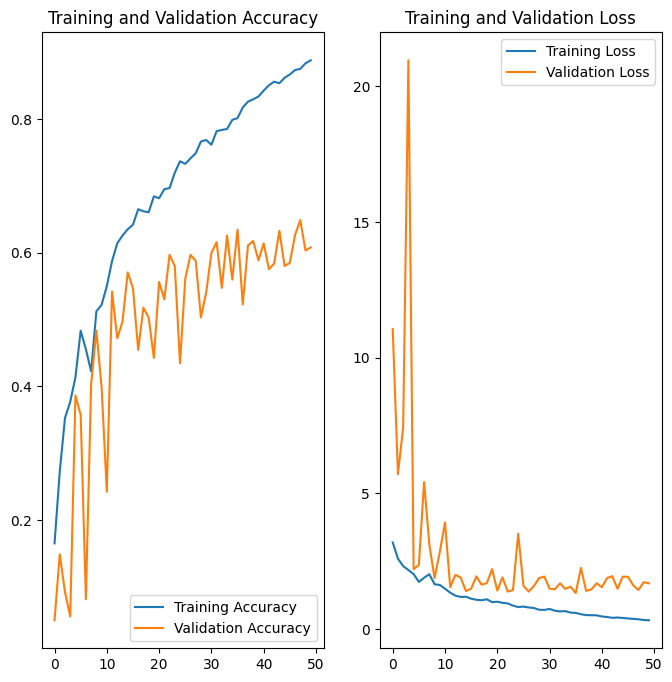

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()